# Bike sharing Case study - Linear Regression

#### Problem statement 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Company want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands. 

#### Business Goal

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.
- Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1 Reading and understanding the data


In [497]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import statsmodels.api as sm

# suppres warnings
import warnings
warnings.filterwarnings('ignore')

#Setting the options to convert scientific notations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:.4f}'.format

In [498]:
# Reading the dataset
biking = pd.read_csv("day.csv")
biking.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [499]:
# getting insights of dataframe
biking.shape

(730, 16)

In [500]:
# getting descriptive insights of dataframe
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [501]:
# Check for any duplicate entries
biking.duplicated().sum()

0

In [502]:
biking.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9973,0.6836,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0062,0.4654,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000



#### Insights:

- **instant** column is a record index which does not have any significance in out analysis. So we will drop the column
- The varibles **casual** and **registered** are summed up to get **cnt** which is our target variable. Also during prediction we wll not be having these data, so we will drop these two variables which we are not going to use in the model.
- We are going to use **weekday** varible which is derived from **dteday**, so we will not be using **dteday** and will drop it.
- **temp** and **atemp** are directly correlated among each other. We will use **temp** and drop **atemp**

In [503]:
biking.drop(['instant', 'dteday','casual','registered','atemp'], axis=1, inplace=True)

In [504]:
biking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.1108,80.5833,10.7499,985
1,1,0,1,0,0,0,2,14.9026,69.6087,16.6521,801
2,1,0,1,0,1,1,1,8.0509,43.7273,16.6367,1349
3,1,0,1,0,2,1,1,8.2000,59.0435,10.7398,1562
4,1,0,1,0,3,1,1,9.3052,43.6957,12.5223,1600


In [505]:
biking.shape

(730, 11)

In [506]:
biking.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,2.4986,0.5000,6.5260,0.0288,2.9973,0.6836,1.3945,20.3193,62.7652,12.7636,4508.0068
std,1.1102,0.5003,3.4502,0.1673,2.0062,0.4654,0.5448,7.5067,14.2376,5.1958,1936.0116
min,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,0.0000,1.5002,22.0000
25%,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,52.0000,9.0417,3169.7500
50%,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,62.6250,12.1253,4548.5000
75%,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,72.9896,15.6256,5966.0000
max,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,97.2500,34.0000,8714.0000


## Step2 Data Visualisation 

In [507]:
# first Define Function Univariate.
def univariate(df,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
        plt.show()

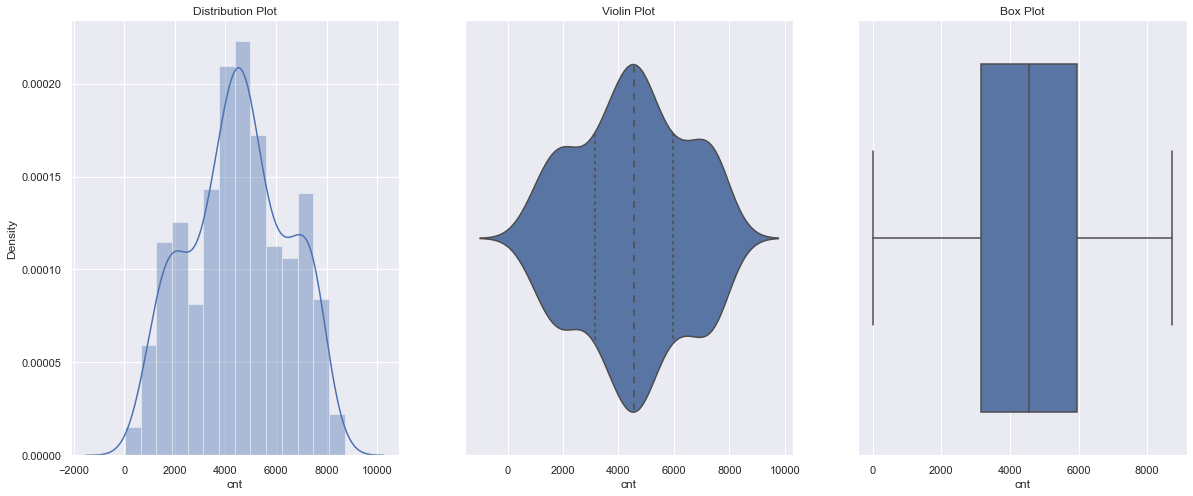

In [508]:
# Univariate analysis on cnt
univariate(df=biking,col='cnt')

Inference - Data is normally distributed bet ween 0 to 10000, mean is 4500

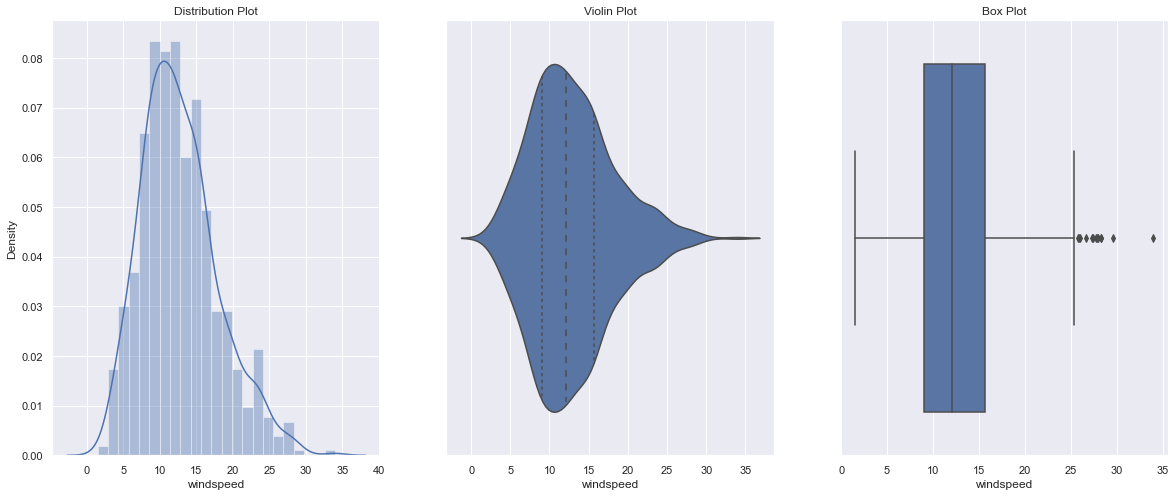

In [509]:
# Univariate analysis on windspeed
univariate(df=biking,col='windspeed')

Inference - windspeed column is normally distributed between 1 to 30 with mean of 12


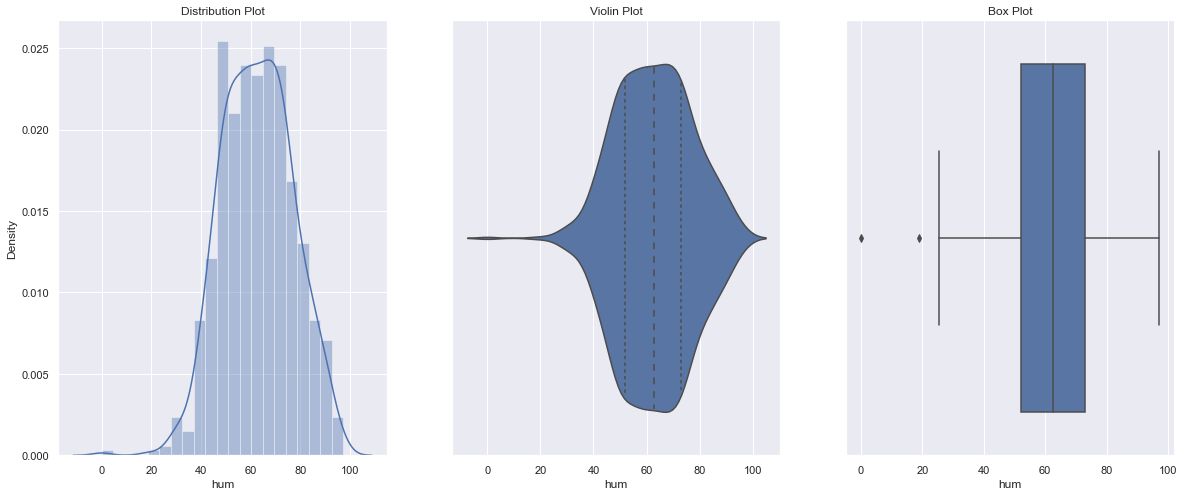

In [510]:
# Univariate analysis on hum
univariate(df=biking,col='hum')

Inference - humudity column data is right skewed normal distribution with mean of 62

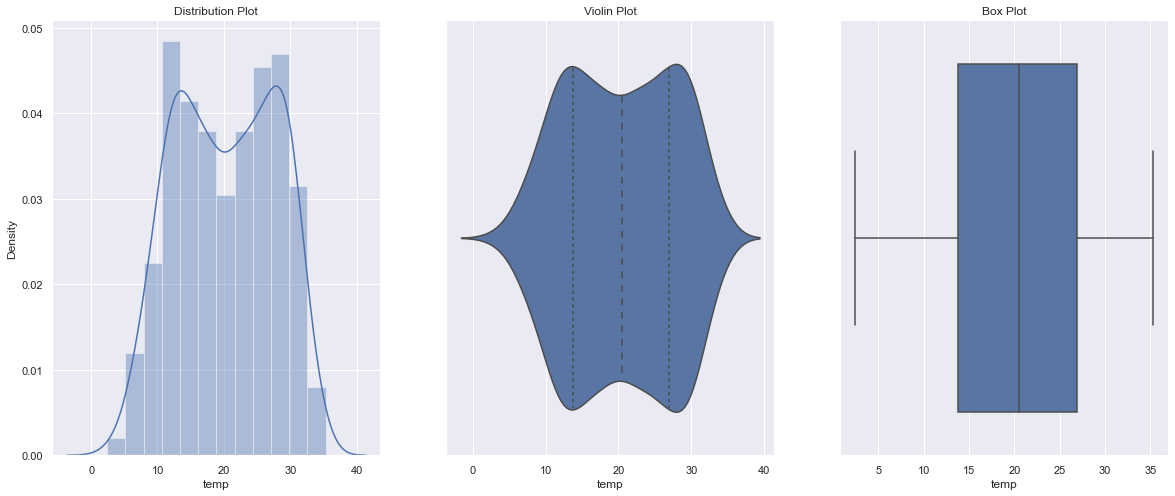

In [511]:
# Univariate analysis on temp
univariate(df=biking,col='temp')

Inference - temp column data is right skewed normal distribution with mean of 20

_Correlation Matrix and Heat Map_


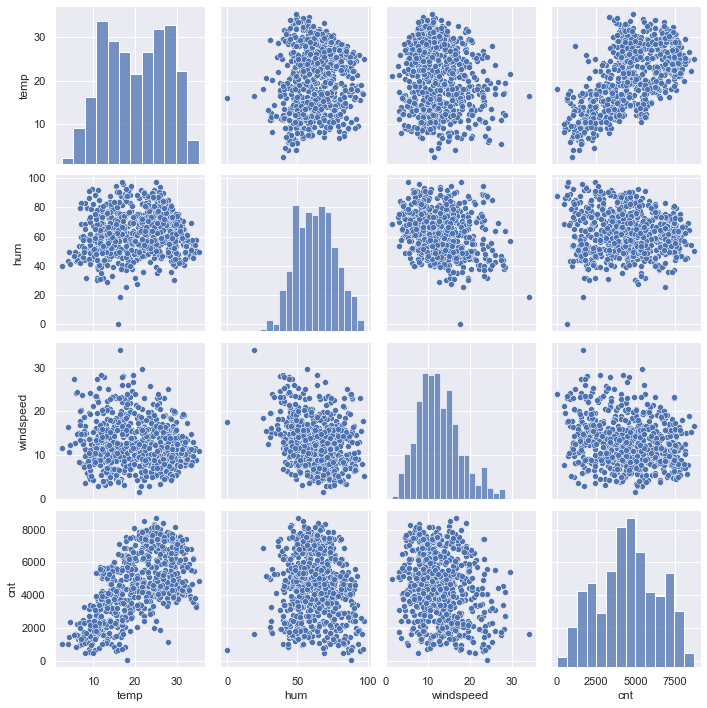

In [512]:
sns.pairplot(biking[['temp','hum','windspeed','cnt']])
plt.show()

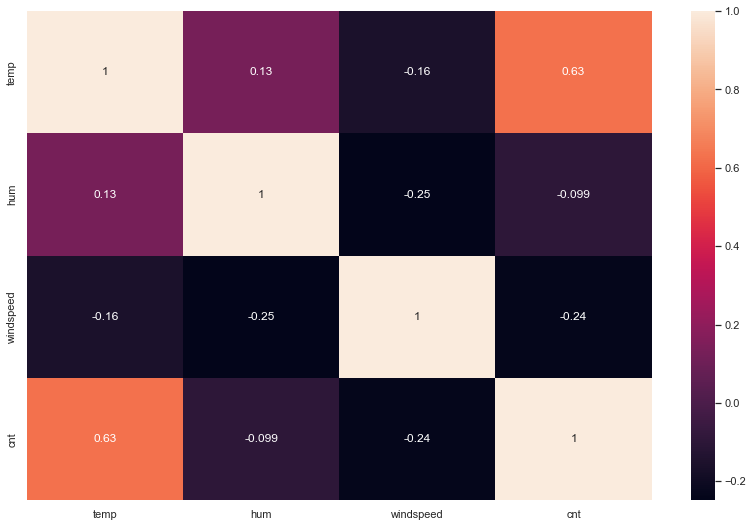

In [513]:
corr_df= biking[['temp','hum','windspeed','cnt']].corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,annot= True)
plt.show()

*Visualising Categorical Variables:*

**Data Disctionary:**

Below categorical columns are having following catecteristics and can be maped with respective values:

- season column is having four seasons as (1:spring, 2:summer, 3:fall, 4:winter)
- mnth column is having 12 categorical values denoting for months Jan to Dec
- weathersit is having for categorical values (1: Clear_FewClouds, 2: Mist_Cloudy, 3: LightSnow_LightRain, 4: HeavyRain_IcePallets)
- weekday column having 7 varibles ( 0 to 6 ) denoting (0: Sun, 1: Mon 2: Tue, 3: Wed, 4: Thu, 5: Fri, 6: Sat)
- yr colmn having 2 varibales (0 & 1) denoting (0: 2018, 1: 2019)


In [514]:
# maped the season column according to descripttions
biking['season'] = biking['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# maped the weekday column according to descriptin
biking['weekday'] = biking['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})


# maped mnth column values (1 to 12 ) as (jan to dec) respectively
biking['mnth'] = biking['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

#  maped weathersit column
biking['weathersit'] = biking['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})


#  maped yr column
biking['yr'] = biking['yr'].map({0: '2018', 1: '2019'})


In [515]:
biking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,0,Sat,0,Mist_Cloudy,14.1108,80.5833,10.7499,985
1,spring,2018,jan,0,Sun,0,Mist_Cloudy,14.9026,69.6087,16.6521,801
2,spring,2018,jan,0,Mon,1,Clear_FewClouds,8.0509,43.7273,16.6367,1349
3,spring,2018,jan,0,Tue,1,Clear_FewClouds,8.2000,59.0435,10.7398,1562
4,spring,2018,jan,0,Wed,1,Clear_FewClouds,9.3052,43.6957,12.5223,1600


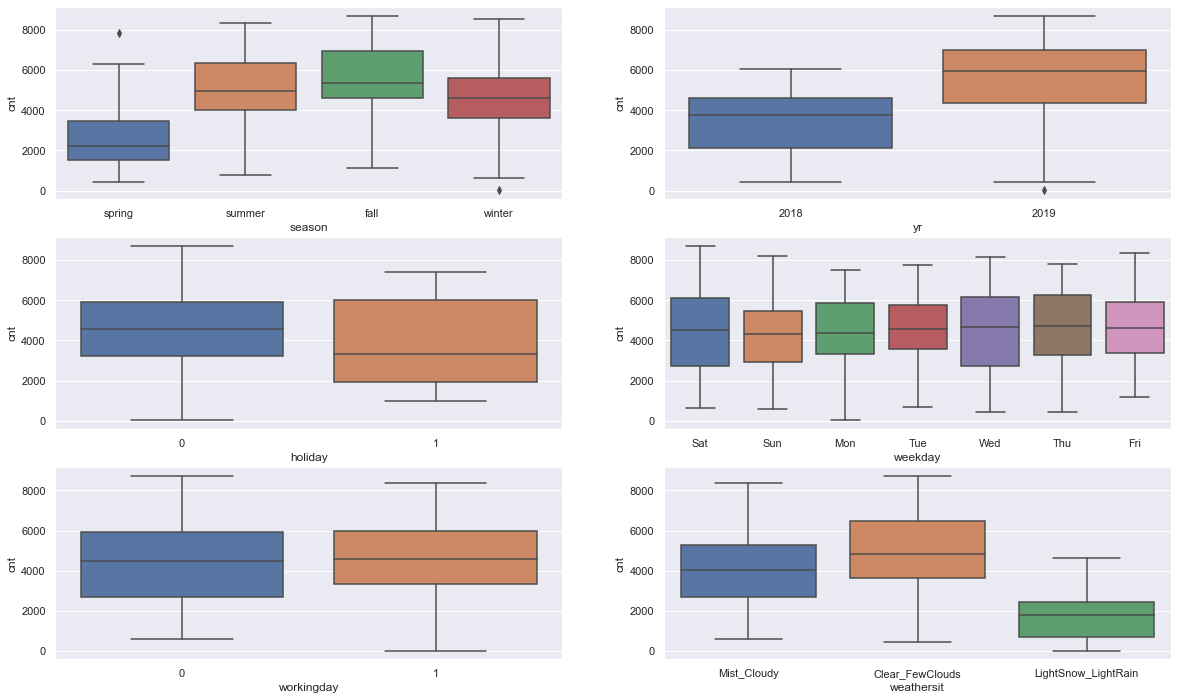

In [516]:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = biking)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = biking)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = biking)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = biking)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = biking)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = biking)
plt.show()

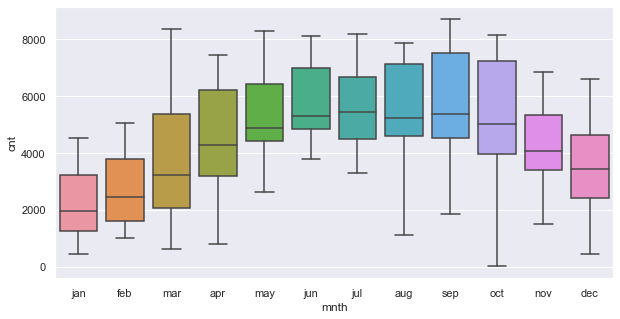

In [517]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = biking)
plt.show()

In [518]:
biking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,0,Sat,0,Mist_Cloudy,14.1108,80.5833,10.7499,985
1,spring,2018,jan,0,Sun,0,Mist_Cloudy,14.9026,69.6087,16.6521,801
2,spring,2018,jan,0,Mon,1,Clear_FewClouds,8.0509,43.7273,16.6367,1349
3,spring,2018,jan,0,Tue,1,Clear_FewClouds,8.2000,59.0435,10.7398,1562
4,spring,2018,jan,0,Wed,1,Clear_FewClouds,9.3052,43.6957,12.5223,1600


In [519]:
biking.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

## Step3 : Data Preparation

In [520]:
# get dummy variables for season, weekday, mnth and weathersit
dummy_vars = pd.get_dummies(biking[['season','weekday','yr', 'mnth','weathersit']],drop_first=True)

# concat the dummy df with original df
biking = pd.concat([biking,dummy_vars], axis = 1)

# drop season column
biking.drop(['season','weekday', 'yr', 'mnth','weathersit'], axis=1, inplace=True)

biking.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Mon,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
0,0,0,14.1108,80.5833,10.7499,985,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,14.9026,69.6087,16.6521,801,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,8.0509,43.7273,16.6367,1349,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,1,8.2000,59.0435,10.7398,1562,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,9.3052,43.6957,12.5223,1600,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [521]:
np.random.seed(0)
bb_train, bb_test = train_test_split(biking, train_size = 0.70, random_state = 100)
print(bb_train.shape)
print(bb_test.shape)

(510, 29)
(220, 29)


**Re-scale the numerical features using Standard Scaler**

windspeed, hum,temp and cnt have larger integer values, we can rescale the variables so that they have a comparable scale.

In [522]:
scaler =  StandardScaler()

In [523]:
# apply scaller to all columns except dummy variables
scale_columns=['cnt','temp','hum','windspeed']
bb_train[scale_columns] = scaler.fit_transform(bb_train[scale_columns])

In [524]:
bb_train.head()


,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Mon,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
576,0,1,1.2309,0.5158,-0.3313,1.4012,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,0,0,-0.4212,-0.0706,-0.3864,-0.2152,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,-1.2956,-1.0461,2.0174,-1.3800,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,0,0,-0.6283,-1.0018,-0.7805,-0.1362,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
111,0,1,-0.8492,0.6956,0.3543,-1.4380,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [525]:
# transform test dataset 
bb_test[scale_columns] = scaler.fit_transform(bb_test[scale_columns])
bb_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Mon,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
184,1,0,1.1737,0.1290,-1.4387,0.7800,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
535,0,1,1.4727,-0.1893,-1.0022,0.8684,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
299,0,1,-0.2010,1.3446,0.1313,-1.0005,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
221,0,1,1.3879,-1.3557,0.1650,0.1155,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,1,1.1112,-2.1834,1.4076,0.2144,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [526]:
bb_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Mon,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,...,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.0255,0.6765,-0.0000,-0.0000,0.0000,0.0000,0.2431,0.2471,0.2471,0.1510,...,0.0882,0.0765,0.0765,0.0980,0.0843,0.0863,0.0843,0.0804,0.0294,0.3451
std,0.1578,0.4683,1.0010,1.0010,1.0010,1.0010,0.4294,0.4317,0.4317,0.3584,...,0.2839,0.2660,0.2660,0.2977,0.2781,0.2810,0.2781,0.2722,0.1691,0.4759
min,0.0000,0.0000,-2.3819,-4.4644,-1.8916,-2.2904,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,-0.8757,-0.7676,-0.7174,-0.7006,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,1.0000,0.0229,0.0222,-0.1422,0.0229,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,1.0000,0.8765,0.7162,0.5516,0.7636,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
max,1.0000,1.0000,2.0500,2.3988,4.0034,2.1699,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


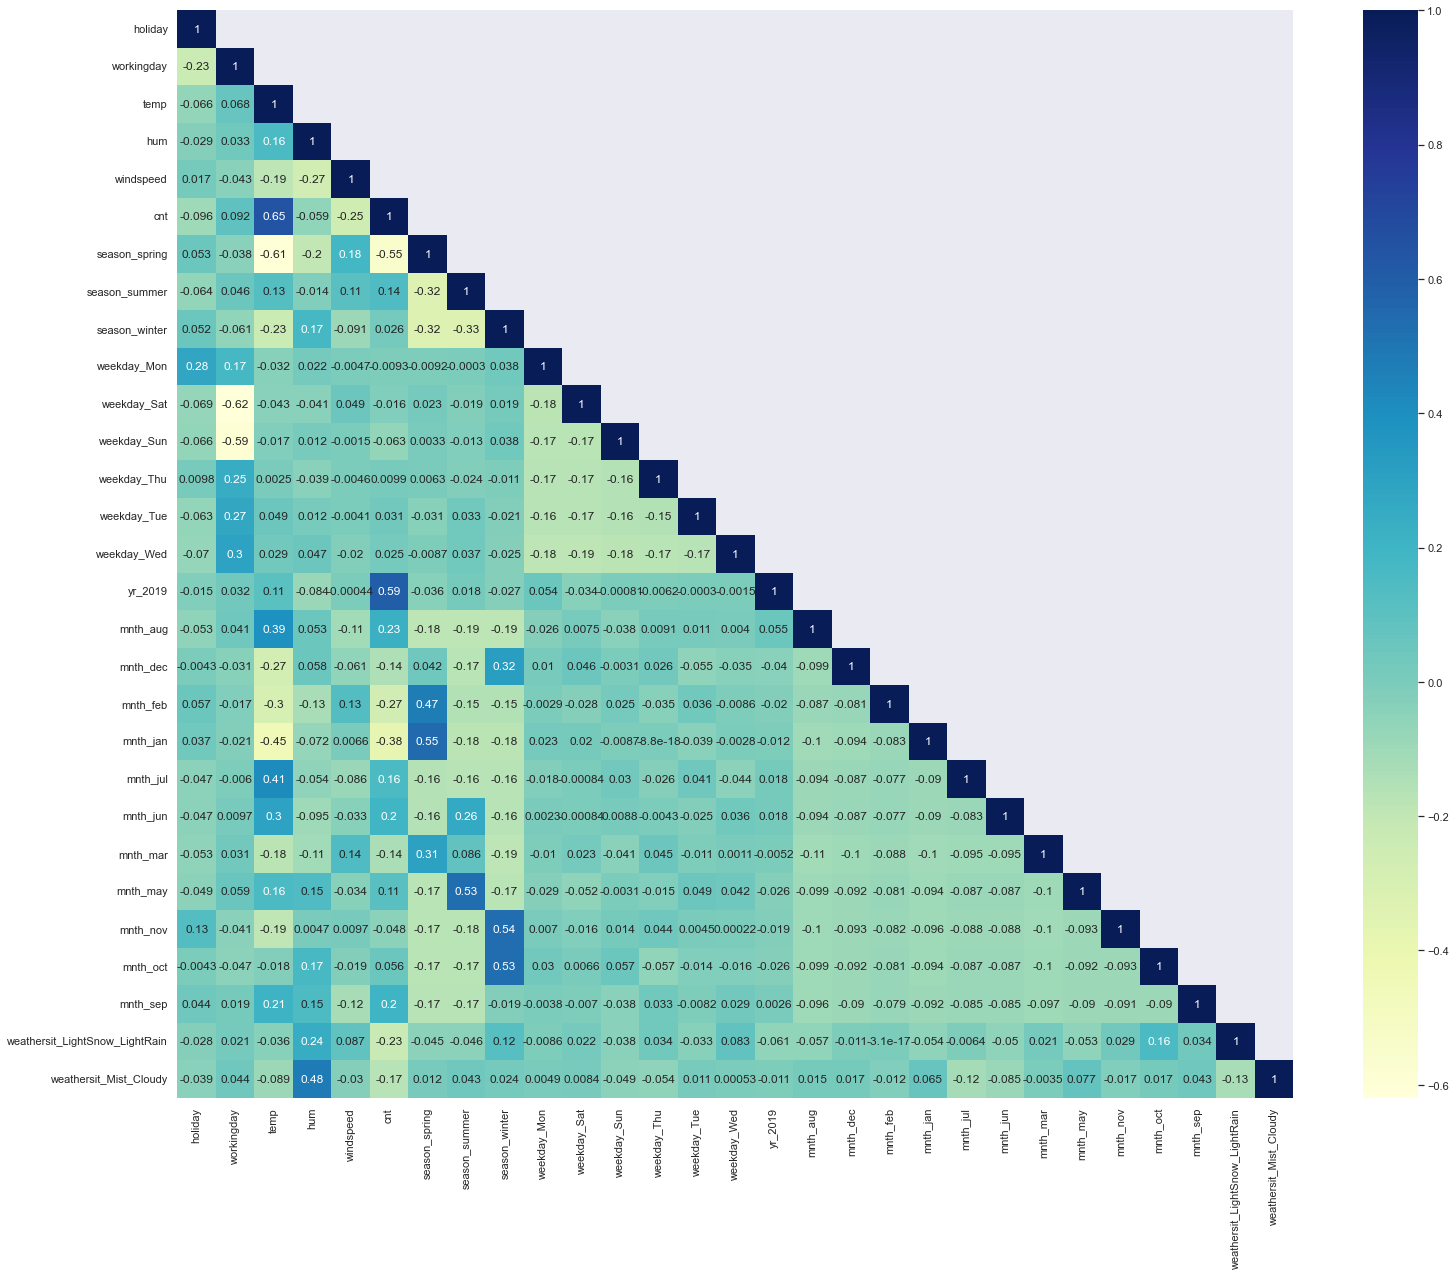

In [527]:
#Now we can plot correlation matrix for bb_train data
mask=np.array(bb_train.corr())
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize = (25, 20))
sns.heatmap(bb_train.corr(), mask=mask, annot = True, cmap="YlGnBu")
plt.show()

temp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt.


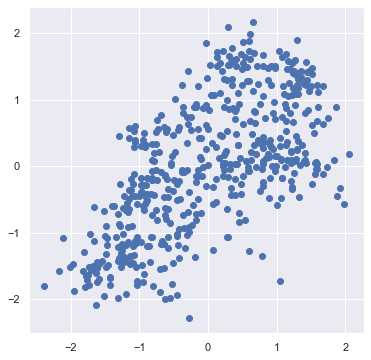

In [528]:
plt.figure(figsize=[6,6])
plt.scatter(bb_train.temp, bb_train.cnt)
plt.show()


Inference - So, we pick temp as the first variable and we'll try to fit a regression line to that.


**Dividing data into X and Y sets for the model building**


In [529]:
y_train = bb_train.pop('cnt')
X_train = bb_train

In [530]:
X_train.shape


(510, 28)

In [531]:
y_train.shape


(510,)

## Step 5: Building a linear model

Fit a regression line using statsmodels.:

In [532]:
# Add a constant
X_train_lm = sm.add_constant(X_train)


# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()



In [533]:
lr.params

const                            -0.4585
holiday                          -0.3409
workingday                        0.0433
temp                              0.4482
hum                              -0.0984
windspeed                        -0.1407
season_spring                    -0.2000
season_summer                     0.1918
season_winter                     0.4801
weekday_Mon                      -0.0934
weekday_Sat                       0.0405
weekday_Sun                      -0.2013
weekday_Thu                      -0.0407
weekday_Tue                      -0.0800
weekday_Wed                      -0.0245
yr_2019                           1.0367
mnth_aug                          0.0909
mnth_dec                         -0.1975
mnth_feb                         -0.1447
mnth_jan                         -0.2824
mnth_jul                         -0.1510
mnth_jun                          0.0205
mnth_mar                          0.0057
mnth_may                          0.1100
mnth_nov        

In [535]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.00e-181
Time:                        22:02:39   Log-Likelihood:                -235.53
No. Observations:                 510   AIC:                             527.1
Df Residuals:                     482   BIC:                             645.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Dropping the Variable and Updating the Model:**

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. Predictor that has a low p-value is likely to be a meaningful addition to th model. SO we can drop variables having p value > 0.05

In [536]:
# We have high P value for mnth_March feature, so we can drop the column and fit the model again.

X_train=X_train.drop('mnth_mar', 1)

In [537]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [538]:
# Print the summary of the model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.87e-182
Time:                        22:02:44   Log-Likelihood:                -235.53
No. Observations:                 510   AIC:                             525.1
Df Residuals:                     483   BIC:                             639.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [539]:
# We have high P value for mnth_jun feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_jun', 1)

In [540]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [541]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.72e-183
Time:                        22:03:28   Log-Likelihood:                -235.55
No. Observations:                 510   AIC:                             523.1
Df Residuals:                     484   BIC:                             633.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [542]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,29.6900
7,season_winter,8.8100
5,season_spring,8.7200
6,season_summer,7.4700
9,weekday_Sat,6.7300
10,weekday_Sun,6.0700
2,temp,4.9600
21,mnth_nov,4.7600
22,mnth_oct,4.4500
15,mnth_aug,3.5100


In [543]:
# We have high P value for mnth_October feature, so we can drop the column and fit the model again
X_train=X_train.drop('mnth_oct', 1)

In [544]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [545]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.53e-184
Time:                        22:04:11   Log-Likelihood:                -235.57
No. Observations:                 510   AIC:                             521.1
Df Residuals:                     485   BIC:                             627.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [546]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,26.2000
5,season_spring,8.5500
6,season_summer,6.6000
7,season_winter,6.2700
9,weekday_Sat,5.9400
10,weekday_Sun,5.2900
2,temp,4.9200
15,mnth_aug,3.1700
19,mnth_jul,2.8100
18,mnth_jan,2.3800


In [547]:
# We have high P value for weekday_Wednesday feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_Wed', 1)

In [548]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [549]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.42e-185
Time:                        22:04:35   Log-Likelihood:                -235.64
No. Observations:                 510   AIC:                             519.3
Df Residuals:                     486   BIC:                             620.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [550]:
# We have high P value for weekday_Thursday feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_Thu', 1)

In [551]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [552]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.36e-186
Time:                        22:04:59   Log-Likelihood:                -235.75
No. Observations:                 510   AIC:                             517.5
Df Residuals:                     487   BIC:                             614.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [553]:
# We have high P value for mnth_aug feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('mnth_aug', 1)

In [554]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [555]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.47e-187
Time:                        22:05:19   Log-Likelihood:                -235.97
No. Observations:                 510   AIC:                             515.9
Df Residuals:                     488   BIC:                             609.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [556]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,11.4000
5,season_spring,5.7900
2,temp,4.9000
7,season_winter,3.8800
6,season_summer,3.4900
9,weekday_Sat,3.2600
10,weekday_Sun,3.0300
15,mnth_jan,2.3800
3,hum,1.9700
14,mnth_feb,1.8700


The variable workingday has a significantly high VIF (11.43). Hence, this variable isn't of much use and should be dropped

In [557]:
X_train=X_train.drop('weekday_Tue', 1)

In [558]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [559]:
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.51e-188
Time:                        22:06:18   Log-Likelihood:                -236.53
No. Observations:                 510   AIC:                             515.1
Df Residuals:                     489   BIC:                             604.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [560]:
# We have high P value for weekday_Saturday feature, so we can drop the column and fit the model again¶
X_train=X_train.drop('workingday', 1)

In [561]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [562]:
# Print the summary of the model

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.51e-188
Time:                        22:06:48   Log-Likelihood:                -236.53
No. Observations:                 510   AIC:                             515.1
Df Residuals:                     489   BIC:                             604.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [563]:
# We have high P value for weekday_Tue feature, so we can drop the column and fit the model again

X_train=X_train.drop('weekday_Sat', 1)

In [564]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [565]:

# Print the summary of the model

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.60e-189
Time:                        22:07:14   Log-Likelihood:                -236.78
No. Observations:                 510   AIC:                             513.6
Df Residuals:                     490   BIC:                             598.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [566]:
# We have high P value for weekday_Mon  feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_may', 1)

In [567]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [568]:
# Print the summary of the model

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          6.22e-190
Time:                        22:07:44   Log-Likelihood:                -237.60
No. Observations:                 510   AIC:                             513.2
Df Residuals:                     491   BIC:                             593.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [569]:


# We have high P value for mnth_May feature, so we can drop the column and fit the model again.
X_train=X_train.drop('weekday_Mon', 1)

In [570]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [571]:
# Print the summary of the model

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.1
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.11e-190
Time:                        22:08:12   Log-Likelihood:                -238.49
No. Observations:                 510   AIC:                             513.0
Df Residuals:                     492   BIC:                             589.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [572]:
# We have high P value for mnth_Feb feature, so we can drop the column and fit the model again.
X_train=X_train.drop('mnth_feb', 1)

In [573]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [574]:
# Print the summary of the model

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.92e-191
Time:                        22:08:34   Log-Likelihood:                -239.80
No. Observations:                 510   AIC:                             513.6
Df Residuals:                     493   BIC:                             585.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [575]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.8100
4,season_spring,2.8000
6,season_winter,2.7100
15,weathersit_Mist_Cloudy,2.1400
8,yr_2019,2.0200
12,mnth_nov,1.8500
2,hum,1.7900
10,mnth_jan,1.7800
9,mnth_dec,1.5500
5,season_summer,1.4600


In [576]:
# list down and check variables of final model
var_final = list(lr_12.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lr_12.params,3))

Final Selected Variables: ['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'weekday_Sun', 'yr_2019', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sep', 'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy']

Coefficent for the variables are:
const                            -0.4150
holiday                          -0.4390
temp                              0.4790
hum                              -0.0980
windspeed                        -0.1410
season_spring                    -0.2710
season_summer                     0.1890
season_winter                     0.4650
weekday_Sun                      -0.2070
yr_2019                           1.0290
mnth_dec                         -0.1710
mnth_jan                         -0.2020
mnth_jul                         -0.2320
mnth_nov                         -0.1790
mnth_sep                          0.3290
weathersit_LightSnow_LightRain   -1.1380
weathersit_Mist_Cloudy           -0.2590
dtype

**The model lr_12 looks good because there are no features which is >0.05 and all the features VIF is less than 3.**

## Step 6: Residual Analysis of the train data:

In [577]:

# Select final variables from the test dataset
X_train_res = X_train[var_final]
#Add constant
X_train_res = sm.add_constant(X_train_res)

In [578]:
y_train_pred = lr_12.predict(X_train_res)

Text(0.5, 0, 'Errors')

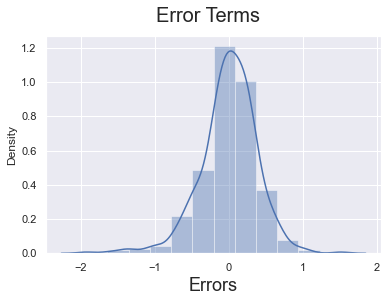

In [579]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

**The distribution plot of error term shows the normal distribution with mean at Zero.**

## Step 7: Making Predictions Using the Final Model:

In [580]:
bb_test

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Mon,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
184,1,0,1.1737,0.1290,-1.4387,0.7800,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
535,0,1,1.4727,-0.1893,-1.0022,0.8684,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
299,0,1,-0.2010,1.3446,0.1313,-1.0005,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
221,0,1,1.3879,-1.3557,0.1650,0.1155,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,1,1.1112,-2.1834,1.4076,0.2144,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,1,-0.1697,0.7947,-0.1878,1.0762,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,0.1115,0.0856,-1.5311,-0.1197,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
640,0,1,0.8032,1.2115,-1.6404,1.5844,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
72,0,1,-0.9764,-0.8501,-0.6901,-1.3230,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


**Dividing into X_test and y_test**

In [581]:
y_test = bb_test.pop('cnt')
X_test = bb_test

In [582]:
X_test.shape

(220, 28)

In [583]:
y_test.shape

(220,)

In [584]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [585]:
X_train.columns
var_final

['holiday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'weekday_Sun',
 'yr_2019',
 'mnth_dec',
 'mnth_jan',
 'mnth_jul',
 'mnth_nov',
 'mnth_sep',
 'weathersit_LightSnow_LightRain',
 'weathersit_Mist_Cloudy']

In [586]:
X_test_m.columns


Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'yr_2019', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sep', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [587]:
# Creating X_test_m dataframe by dropping variables from X_test_m:

drop_cols = ['mnth_mar','mnth_jun','mnth_oct','weekday_Thu','weekday_Mon', 'weekday_Tue' ,'workingday','weekday_Sat',
             'mnth_aug','weekday_Wed','mnth_may','mnth_feb']
X_test_m = X_test_m.drop(drop_cols, axis = 1)

In [588]:
y_pred_m = lr_12.predict(X_test_m)

## Step 8: Model Evaluation:


Text(0, 0.5, 'y_pred')

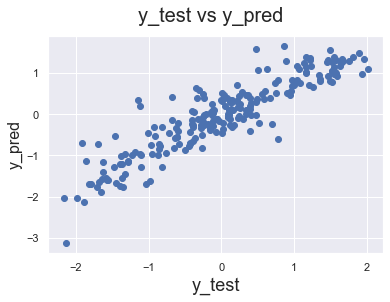

In [589]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

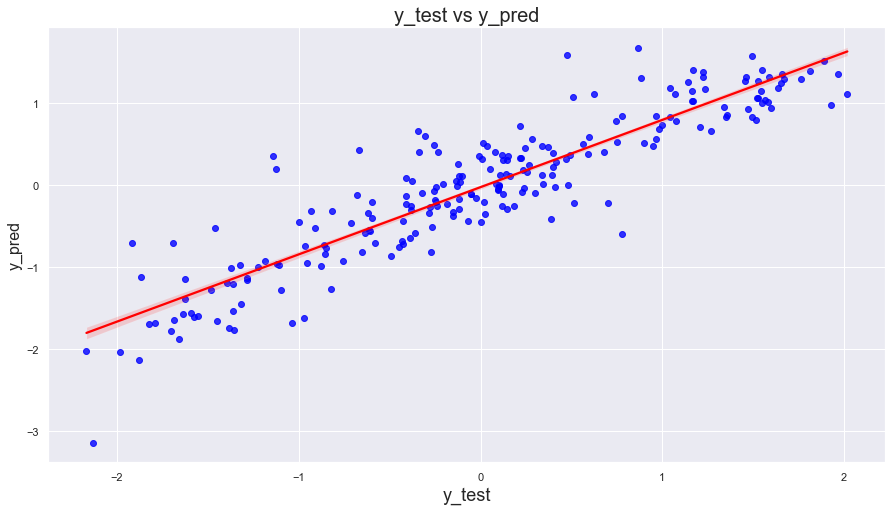

In [594]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred_m, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [590]:

print('Train R-Score: ' ,r2_score(y_train,y_train_pred))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_pred_m))

Train R-Score:  0.8500543879303458
Test R-Score:  0.8220321219518284


In [591]:
X_train.columns


Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weekday_Sun', 'yr_2019', 'mnth_dec', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sep', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

#### Significant variables to predict the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Season(Spring,Summer,Winter)
- months(January, July, September, November, Septemer)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist Cloudy)

